In [4]:
# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [5]:
y[:3]

array([24. , 21.6, 34.7])

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

c:\users\iwannab1\anaconda3\envs\edu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
reg.score(X, y)

0.7406426641094094

In [8]:
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

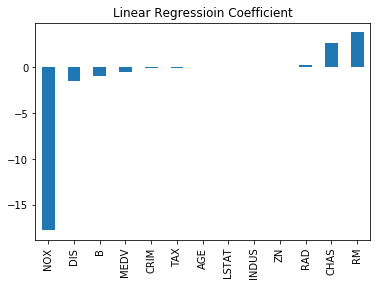

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV']

coef = pd.Series(reg.coef_, columns).sort_values()
coef.plot(kind='bar', title='Linear Regressioin Coefficient')

### Ridge Regression

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.05, normalize=True).fit(X, y)
ridge.score(X, y)

0.7370281371340788

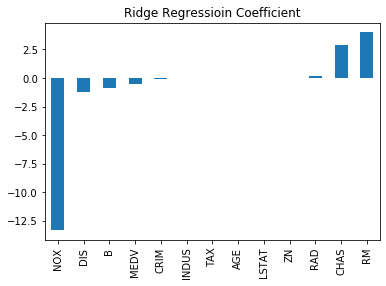

In [14]:
ridgecoef = pd.Series(ridge.coef_, columns).sort_values()
ridgecoef.plot(kind='bar', title='Ridge Regressioin Coefficient(alpha=0.05)')

In [15]:
ridge = Ridge(alpha=5, normalize=True).fit(X, y)
ridge.score(X, y)

0.4153202524550733

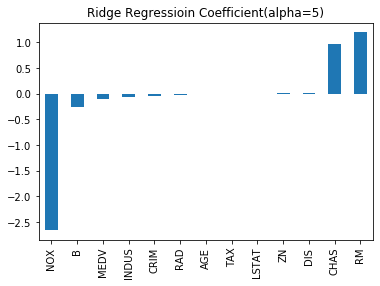

In [16]:
ridgecoef = pd.Series(ridge.coef_, columns).sort_values()
ridgecoef.plot(kind='bar', title='Ridge Regressioin Coefficient(alpha=5)')

### Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.03, normalize=True).fit(X, y)
lasso.score(X, y)

0.6809218209276944

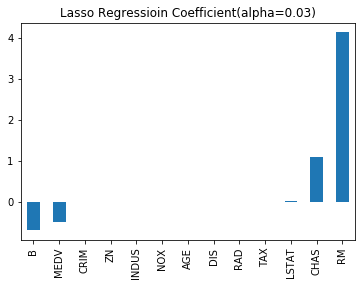

In [21]:
lacoef = pd.Series(lasso.coef_, columns).sort_values()
lacoef.plot(kind='bar', title='Lasso Regressioin Coefficient(alpha=0.03)')

### Elastic Net Regression

In [24]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.05, l1_ratio=0.05, normalize=False).fit(X, y)
enet.score(X, y)

0.7284551689900163

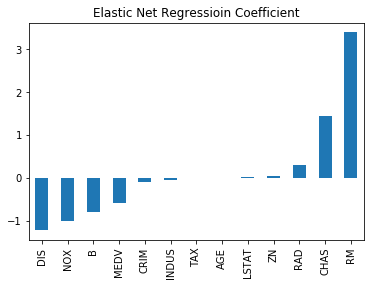

In [25]:
enetcoef = pd.Series(enet.coef_, columns).sort_values()
enetcoef.plot(kind='bar', title='Elastic Net Regressioin Coefficient')

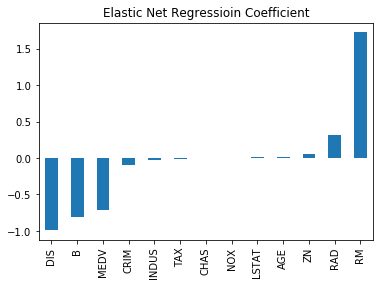

In [26]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.5, normalize=False).fit(X, y)
enetcoef = pd.Series(enet.coef_, columns).sort_values()
enetcoef.plot(kind='bar', title='Elastic Net Regressioin Coefficient')

- alpha = a + b, l1_ratio = a / (a + b)
- a, b : L1, L2 가중치

- alpha = 1 , l1_ratio = 1 -> Lasso
- alpha = 1 , l1_ratio = 0 -> Ridge
- alpha = 1 , 0 < l1_ratio < 1 -> Elastic Net 